In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from sklearn.linear_model import LogisticRegression
import time
import math
from sklearn import datasets
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

# Problem 1
## Dataset Generation

Write a function to **generate a training set** of size $m$
- randomly generate a weight vector $w \in \mathbb{R}^{10}$, normalize length
- generate a training set $\{(x_i , y_i)\}$ of size m
  - $x_i$: random vector in $\mathbb{R}^{10}$ from $\textbf{N}(0, I)$
  - $y_i$: $\{0, +1\}$ with $P[y = +1] = \sigma(w \cdot x_i)$ and $P[y = 0] = 1 - \sigma(w \cdot x_i)$

In [11]:
def generate_data(m):
    # returns the true w as well as X, Y data
    ...

    w = np.random.randn(10)
    a = np.linalg.norm(w)
    # b = np.sqrt(np.sum(np.square(w)))
    w2 = w/a
    # c = np.linalg.norm(w2)

    # m = 50
    x = np.random.randn(m, 10)

    y = np.dot(x, w2)
    y = special.expit(y)
    # d = np.dot(w, x[0])
    # e = x[0]
    y2 = np.zeros(m)

    for i in range(0, m):
        y2[i] = np.random.choice(2, 1, p=[1-y[i], y[i]])

    return w2, x, y2

## Algorithm 1: logistic regression

The goal is to learn $w$.  Algorithm 1 is logistic
  regression (you may use the built-in method LogisticRegression for this. Use max_iter=1000).

In [12]:

start_time = time.time()
acc_log_reg = np.zeros(5)
count = 0

for m in range(50, 300, 50):
    acc_temp = np.zeros(10)
    for i in range(0, 10):
        w_orig, x, y = generate_data(m)

        log_reg = LogisticRegression(max_iter=1000)
        log_reg.fit(x, y)
        w_prime = log_reg.coef_
        diff_w = w_orig - w_prime
        acc_temp[i] = np.linalg.norm(diff_w)
    acc_log_reg[count] = np.average(acc_temp)
    count += 1

time_taken = time.time() - start_time
print("--- %s seconds ---" % time_taken)


--- 0.28127121925354004 seconds ---


## Algorithm 2: gradient descent with square loss

Define square loss as
$$L_i(w^{(t)}) = \frac{1}{2} \left( \sigma(w^{(t)} \cdot x) - y_i \right)^2$$

  Algorithm 2 is
  gradient descent with respect to square loss (code this
  up yourself -- run for 1000 iterations, use step size eta = 0.01).




In [13]:

start_time = time.time()
step_size = 0.01
max_iterations = 1000
acc_log_gd = np.zeros(5)
count = 0

for m in range(50, 300, 50):
    acc_temp = np.zeros(10)

    for k in range(0, 10):

        w, x, y = generate_data(m)
        w_prime = np.zeros(10)

        for j in range(0, max_iterations):

            gradient = np.zeros(10)

            for i in range(0, m):
                gradient += (special.expit(np.dot(w_prime, x[i])) - y[i])\
                            * (((1 + math.exp(-np.dot(w_prime, x[i]))) ** -2)*x[i]*math.exp(-np.dot(w_prime, x[i])))

            gradient = gradient/m

            w_prime = w_prime - step_size*gradient

        diff_w = w - w_prime
        acc_temp[k] = np.linalg.norm(diff_w)

    acc_log_gd[count] = np.average(acc_temp)
    count += 1

print("The value of my gradient function is"
      "(sigmoid(w'*x) - y)*((1+exp(-w'*x))^-2 * x * exp(-w'*x))")
time_taken = time.time() - start_time
print("--- %s seconds ---" % time_taken)





The value of my gradient function is(sigmoid(w'*x) - y)*((1+exp(-w'*x))^-2 * x * exp(-w'*x))
--- 77.7946994304657 seconds ---


## Algorithm 3: stochastic gradient descent with square loss
Similar to gradient descent, except we use the gradient at a single random training point every iteration.

In [14]:

start_time = time.time()
step_size = 0.01
max_iterations = 1000
acc_log_sgd = np.zeros(5)
count = 0

for m in range(50, 300, 50):
    acc_temp = np.zeros(10)

    for k in range(0, 10):

        w, x, y = generate_data(m)
        w_prime = np.zeros(10)

        for j in range(0, max_iterations):

            gradient = np.zeros(10)

            i = np.random.choice(m)

            gradient += (special.expit(np.dot(w_prime, x[i])) - y[i])\
                        * (((1 + math.exp(-np.dot(w_prime, x[i]))) ** -2)*x[i]*math.exp(-np.dot(w_prime, x[i])))

            w_prime = w_prime - step_size*gradient

        diff_w = w - w_prime
        acc_temp[k] = np.linalg.norm(diff_w)

    acc_log_sgd[count] = np.average(acc_temp)
    count += 1

time_taken = time.time() - start_time
print("--- %s seconds ---" % time_taken)

--- 1.3895583152770996 seconds ---


## Evaluation

Measure error $\|w - \hat{w}\|_2$ for each method at different sample size. For any
  fixed value of $m$, choose many different $w$'s and average the
  values $\|w - 
  \hat{w}\|_2$ for Algorithms 1, 2 and 3.  Plot the results
  for for each algorithm as you make $m$ large (use $m=50, 100, 150, 200, 250$).
  Also record, for each algorithm, the time taken to run the overall experiment.

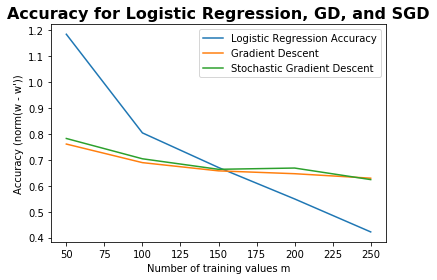

In [15]:
m_arr = np.arange(50, 300, 50)


plt.plot(m_arr, acc_log_reg, label="Logistic Regression Accuracy")
plt.plot(m_arr, acc_log_gd, label="Gradient Descent")
plt.plot(m_arr, acc_log_sgd, label="Stochastic Gradient Descent")
plt.xlabel("Number of training values m")
plt.ylabel("Accuracy (norm(w - w'))")
plt.title("Accuracy for Logistic Regression, GD, and SGD", fontsize=16, fontweight='bold')
plt.legend()
plt.show()



# Problem 2

In [16]:
from sklearn import datasets

In [17]:
cancer = datasets.load_breast_cancer()

For each depth in $1, \dots, 5$, instantiate an AdaBoost classifier with the base learner set to be a decision tree of that depth (set `n_estimators=10` and `learning_rate=1`), and then record the 10-fold cross-validated error on the entire breast cancer data set. Plot the resulting curve of accuracy against base classifier depth. Use $101$ as your random state for both the base learner as well as the AdaBoost classifier every time.

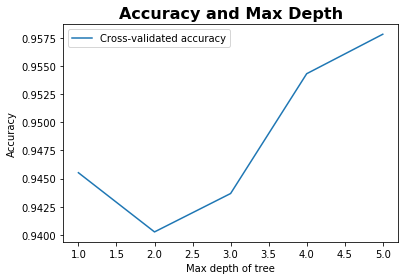

In [18]:


cancer = datasets.load_breast_cancer()

df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['target'] = cancer.target
df['diagnosis'] = np.array([cancer.target_names[i] for i in cancer.target])

target = df['target']
q = np.where(target == 0)[0]
# malignancy_count = len(q)

rows, columns = df.shape

# rate_of_malignancy = malignancy_count/rows

# print("The base rate of malignant cancer occurence is: ", rate_of_malignancy)

features_data = df.drop(['target', 'diagnosis'], axis=1)
target_data = df['target']

# X_train, X_test, y_train, y_test = train_test_split(features_data, target_data, test_size=0.1, random_state = 101)



cross_val_accuracy = np.zeros(5)
max_depth_arr = np.arange(1, 6)


for i in range(1, 6):

    ada_cancer = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=i, random_state=101),
        n_estimators=10,
        learning_rate=1,
        random_state=101)

    scores = cross_val_score(ada_cancer, features_data, target_data, cv=10)
    cross_val_accuracy[i-1] = scores.mean()


plt.plot(max_depth_arr, cross_val_accuracy, label="Cross-validated accuracy")
plt.xlabel("Max depth of tree")
plt.ylabel("Accuracy")
plt.title("Accuracy and Max Depth", fontsize=16, fontweight='bold')
plt.legend()
plt.show()


